# Load Data and Explore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from sklearn.linear_model import LinearRegression
from datetime import timedelta
import scipy.stats as stats
from datetime import datetime
import calendar

In [2]:
portfolio_df = pd.read_excel('../data/TCI_2018_2025.xlsx', sheet_name='Sheet1')

In [3]:
portfolio_df.head()

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV
0,2018,1,Equity,2.269794e+09,61864102.0,US90130A1016,BBM4S68,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS),21st Century Fox,NaN,0.128385
1,2018,1,Equity,3.703355e+08,10182445.0,US90130A2006,BBM4S80,NaN,NaN,TWENTY FIRST CENTURY FOX CL B ORD (NMS),21st Century Fox,NaN,0.020947
2,2018,1,Equity,1.330941e+09,6600000.0,ES0105046009,BVRZ8L1,NaN,NaN,AENA ORD (MCE) CFD,Aena,NaN,0.075281
3,2018,1,Equity,1.681670e+09,14549199.0,NL0000235190,4012250,NaN,NaN,AIRBUS ORD (PAR),Airbus,NaN,0.095119
4,2018,1,Equity,-4.483429e+09,-24427531.0,US01609W1027,BP41ZD1,NaN,NaN,ALIBABA GROUP HOLDING ADR REP 1 ORD (NYS),Alibaba,NaN,-0.253593


In [4]:
print(portfolio_df.shape)

(1285, 13)


In [5]:
portfolio_df['Year Quarter Formatted'] = portfolio_df['Year'].astype(str) + '-Q' + portfolio_df['Quarter End'].astype(str)
portfolio_df['Year Quarter Date'] = pd.to_datetime(portfolio_df['Year Quarter Formatted']) + pd.offsets.QuarterEnd(0)

/tmp/ipykernel_3344039/4149915252.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_df['Year Quarter Date'] = pd.to_datetime(portfolio_df['Year Quarter Formatted']) + pd.offsets.QuarterEnd(0)


In [6]:
portfolio_df.iloc[80:90]

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
80,2018,2,Equity Swap,8.838462e+08,13863523.0,DE000PAH0038,7101069,NaN,NaN,PORSCHE AUTOMOBIL HOLDING PRF (GER) CFD,Porsche,NaN,0.044554,2018-Q2,2018-06-30
81,2018,2,Equity Swap,-7.165483e+06,-282200.0,DE000PSM7770,BCZM1B2,NaN,NaN,PROSIEBENSAT1 MEDIA N ORD (GER) CFD,ProSiebenSat.1 Media,NaN,-0.000361,2018-Q2,2018-06-30
82,2018,2,Equity Swap,3.127261e+07,555000.0,JE00B2QKY057,B2QKY05,NaN,NaN,SHIRE ORD (LSE) CFD,Shire,NaN,0.001576,2018-Q2,2018-06-30
83,2018,2,Equity Swap,-1.862986e+07,-1000000.0,SE0000108227,B1Q3J35,NaN,NaN,SKF B ORD (STO) CFD,SKF AB,NaN,-0.000939,2018-Q2,2018-06-30
84,2018,2,Equity Swap,-1.968095e+07,-465645.0,JP3463000004,6870445,NaN,NaN,TAKEDA PHARM ORD (TYO) CFD,Takeda Pharmaceutical Co Ltd,NaN,-0.000992,2018-Q2,2018-06-30
85,2018,2,Equity Swap,-7.083289e+08,-31344018.0,AU000000WOW2,6981239,NaN,NaN,WOOLWORTHS ORD (ASX) CFD,Woolworths,NaN,-0.035706,2018-Q2,2018-06-30
86,2018,2,Equity Swap,-8.924166e+07,-26840400.0,JP3933800009,6084848,NaN,NaN,YAHOO JAPAN ORD (TYO) CFD,Yahoo Japan,NaN,-0.004499,2018-Q2,2018-06-30
87,2018,3,Equity,4.733707e+09,102173681.0,US90130A1016,BBM4S68,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS),21st Century Fox,NaN,0.231703,2018-Q3,2018-09-30
88,2018,3,Equity,9.284415e+08,20262801.0,US90130A2006,BBM4S80,NaN,NaN,TWENTY FIRST CENTURY FOX CL B ORD (NMS),21st Century Fox,NaN,0.045445,2018-Q3,2018-09-30
89,2018,3,Equity,-7.413217e+05,-78948.0,US00090Q1031,BFWCP81,NaN,NaN,ADT ORD (NYS),ADT,NaN,-0.000036,2018-Q3,2018-09-30


In [7]:
# portfolio_df.to_csv('your_file_name.csv', index=False)
### Remove Short Position
portfolio_df = portfolio_df[portfolio_df['Mkt value'] > 0]
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "AU000000IFN8"] # asx.ifn is delisted
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "BRCESPACNPB4"] # acquired, no longer traded on the B3 stock exchange as of March 25, 2022. 
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "US90130A1016"] # Fox acquired by disney
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "US90130A2006"] # Fox acquired by disney
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "US90130A3095"] # Fox acquired by disney
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "US90130A4085"] # Fox acquired by disney
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "US35137L1052"] # Fox acquired by disney
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "US35137L2043"] # Fox acquired by disney
portfolio_df = portfolio_df[portfolio_df['ISIN'] != "US7551115071"] # Raytheon Technologies change ticker from RTN to RTX


### replace ISIN number for AENA
portfolio_df.loc[portfolio_df['ISIN'] == 'ES0105046009', 'ISIN'] = 'ES0105046017'

In [8]:
security_type_count = portfolio_df.groupby('Security Type')['ISIN'].nunique()
print(security_type_count)

Security Type
Equity         53
Equity Swap    16
Name: ISIN, dtype: int64


# Portfolio Summary

In [9]:
def create_stacked_bar_chart(df: pd.DataFrame, stacked_column: str):
    """
    Generates a stacked bar chart showing the stacked_column for each ISIN per quarter.

    Args:
        df: A pandas DataFrame with the specified columns.
        stacked_column: variable header whose value to be stacked
    """
    # --- 1. Data Cleaning and Preparation ---
    # Ensure the specified column is a numeric type
    df[stacked_column] = pd.to_numeric(df[stacked_column], errors='coerce')

    # Drop any rows where the stacked_column value is missing or could not be converted
    df.dropna(subset=[stacked_column], inplace=True)
    print(df.shape)

    # --- 2. Create the stacked bar chart using Plotly Express ---
    # The x-axis is the 'Year Quarter Formatted' column
    # The y-axis is the value from the 'stacked_column'
    # The 'color' parameter stacks the bars by 'ISIN'

    fig = px.bar(
        df,
        x='Year Quarter Formatted',
        y=stacked_column,
        color='ISIN',
        title=f'Holding Weight ({stacked_column}) of Each ISIN per Quarter',
        labels={
            stacked_column: f'Value of {stacked_column}',
            'Year Quarter Formatted': 'Quarter'
        },
        hover_data={'ISIN': True, 'Issuer': True, stacked_column: ':,.2f'} # Format hover tooltip
    )

    # Customize the layout for better readability
    fig.update_layout(
        xaxis_title='Quarter',
        yaxis_title=f'Stack of ({stacked_column})',
        legend_title='ISIN',
        barmode='relative', # This ensures the bars are stacked
        yaxis=dict(
            autorange=True
        ),
        uniformtext_minsize=8, # Ensure labels are readable
        uniformtext_mode='hide', # Hide text if it doesn't fit
    )

    fig.show()


### Market Value

In [10]:
portfolio_pivot_mkt_value = pd.pivot_table(
    portfolio_df,
    values='Mkt value',
    index=['ISIN'],
    columns='Year Quarter Formatted',
    aggfunc='sum'
)

In [11]:
portfolio_pivot_mkt_value

Year Quarter Formatted,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,...,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3,2024-Q4,2025-Q1,2025-Q2
ISIN,,,,,,,,,,,,,,,,,,,,,
AU000000AZJ1,1.632502e+09,1.420560e+09,5.336968e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMG475671050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA1363751027,NaN,NaN,1.591299e+08,7.523275e+08,1.072613e+09,1.589384e+09,1.553217e+09,1.583607e+09,1.393469e+09,1.589742e+09,...,3.751464e+09,4.360083e+09,3.898283e+09,4.522195e+09,4.730211e+09,4.243259e+09,3.918246e+09,2.905244e+09,2.541729e+09,1.812271e+09
CA13645T1003,1.677481e+07,4.239872e+08,9.949269e+08,1.328756e+09,1.844159e+09,2.171691e+09,2.179177e+09,2.531059e+09,2.231520e+09,2.580904e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA13646K1084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.901481e+09,4.096268e+09,3.769016e+09,4.008841e+09,4.454947e+09,3.978137e+09,4.319829e+09,3.656980e+09,3.545736e+09,3.174044e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US8936411003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.842880e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US9078181081,9.678960e+06,2.470096e+08,8.191044e+08,1.033431e+09,1.261841e+09,7.995150e+08,7.909129e+08,9.062607e+08,8.446101e+08,1.017216e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US91336L1070,NaN,NaN,NaN,NaN,7.201852e+07,2.980576e+08,2.997408e+08,3.499864e+08,1.474289e+08,2.129887e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1109, 15)


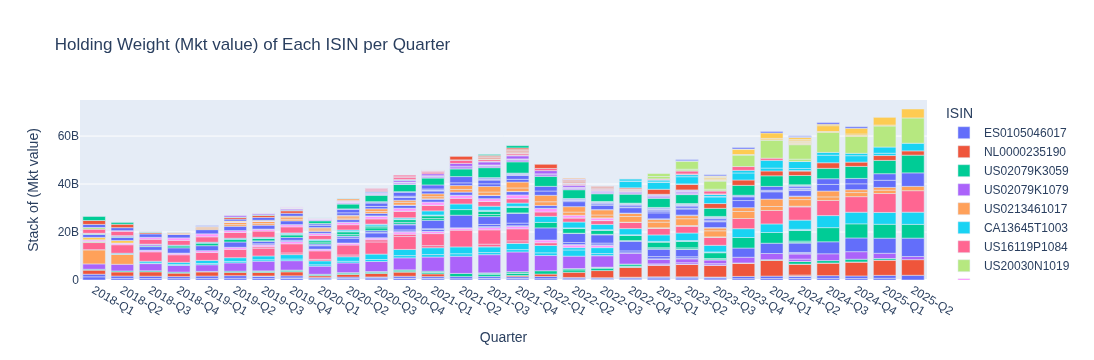

In [12]:
create_stacked_bar_chart(portfolio_df, 'Mkt value')

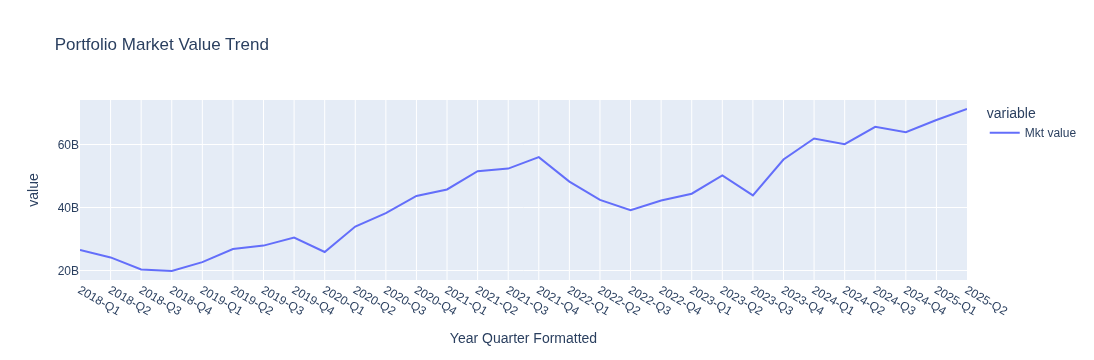

In [13]:
portfolio_value_df = portfolio_df.groupby('Year Quarter Formatted')['Mkt value'].sum().to_frame()
px.line(portfolio_value_df, title ='Portfolio Market Value Trend')


In [14]:
unique_isins = portfolio_df['ISIN'].unique()
unique_isins 

array(['ES0105046017', 'NL0000235190', 'US02079K3059', 'US02079K1079',
       'US0213461017', 'CA13645T1003', 'US16119P1084', 'US20030N1019',
       'FR0010533075', 'GB00B0SWJX34', 'US5949181045', 'US61166W1018',
       'US6153691059', 'US6558441084', 'FR0000131906', 'US78409V1044',
       'FR0000073272', 'US8873173038', 'US9078181081', 'DE0007664039',
       'IT0003506190', 'AU000000AZJ1', 'DE000PAH0038', 'JE00B2QKY057',
       'CA1363751027', 'US5312298541', 'US69331C1080', 'DE000A1DAHH0',
       'US2944291051', 'US91336L1070', 'FR0000125486', 'US0367521038',
       'US92826C8394', 'ES0118900010', 'US0527691069', 'US00724F1012',
       'US6668071029', 'US8936411003', 'FR0000120073', 'GB0002634946',
       'US0231351067', 'IE00BZ12WP82', 'US57636Q1040', 'US1011211018',
       'US75513E1010', 'US9290421091', 'TW0002330008', 'US4824801009',
       'US5128071082', 'US0152711091', 'US49427F1084', 'ES0105066007',
       'BMG475671050', 'US0382221051', 'NL0010273215', 'CA13646K1084',
      

# Return, Correlation & Beta to Market 

### Unique ISIN Given Quater

In [15]:
def get_unique_isin_by_quarter(data_frame, year_quarter_formatted):
    """
    Filters the DataFrame to return a list of unique ISINs for a specified
    'Year Quarter Formatted'.
    
    Args:
        data_frame (pd.DataFrame): The input pandas DataFrame.
        year_quarter_formatted (str): The string representing the year and quarter
                                      (e.g., '2024-Q4').

    Returns:
        list: A list of unique ISINs.
    """
    quarterly_data = data_frame[data_frame['Year Quarter Formatted'] == year_quarter_formatted]
    
    unique_isins = quarterly_data['ISIN'].unique()
    
    return unique_isins.tolist()

### Daily Return Given ISIS and start_date, end_date

In [16]:
def get_daily_returns_data(isins, start_date, end_date):
    """
    Downloads daily adjusted close price data for a list of ISINs and calculates
    the daily returns.

    Note: yfinance uses tickers (e.g., MSFT, GOOGL) not ISINs. This function
    uses a simple hardcoded mapping for demonstration. In a real application,
    you would need a robust ISIN-to-ticker mapping service.

    Args:
        isins (list): A list of ISINs.
        start_date (str): The start date for the data download (YYYY-MM-DD).
        end_date (str): The end date for the data download (YYYY-MM-DD).

    Returns:
        pd.DataFrame: A DataFrame of daily returns for the given ISINs.
    """
    # Simple hardcoded mapping from ISIN to a yfinance-compatible ticker
    isin_to_ticker_map = {
        'US5949181045': 'MSFT',   # Microsoft
        'FR0000125486': 'DG.PA',  # Vinci
        'CA1363751027': 'CNR.TO', # Canadian National Railway
        'US3696043013': 'GE',     # GE Aerospace
        'CA13646K1084': 'CP',     # Canadian Pacific Kansas City
        'US6153691059': 'MCO',    # Moody\'s
        'DE0007236101': 'SIE.DE', # Siemens AG
        'US02079K3059': 'GOOGL',  # Alphabet CL A
        'US02079K1079': 'GOOG',   # Alphabet CL C
        'ES0105046009': 'AENA.MC',# Aena SME
        'US78409V1044': 'SPGI',   # S&P Global
        'ES0105066007': 'CLNX.MC',# Cellnex Telecom SA
        'US92826C8394': 'V',      # Visa CL A
        'NL0015001FS8': 'FER.MC', # Ferrovial
        'NL0000235190': 'AIR.PA', # Airbus
        'FR0000073272': 'SAF.PA', # Safran
        'US90130A1016': 'FOXA',   # FOXA
        'US90130A2006': 'FOX',   # FOX
        'US90130A3095': 'FOXA',   # FOXA
        'US90130A4085': 'FOX',   # FOX
        'US35137L1052': 'FOXA',   # FOXA
        'US35137L2043': 'FOX',   # FOX
        'ES0105046017': 'AENA.MC',# Aena SME (Duplicate ISIN)
        'US0213461017': 'AMZN',   # Amazon.com
        'CA13645T1003': 'CP.TO',  # Canadian Pacific Railway (TSX)
        'US16119P1084': 'CHTR',   # Charter Communications
        'US20030N1019': 'CMCSA',  # Comcast
        'FR0010533075': 'VIE.PA', # Veolia Environnement
        'AU000000IFN8': 'IFN.AX', # Infinity Financial The company was acquired by Iberdrola and delisted from the ASX
        'GB00B0SWJX34': 'SHEL.L', # Royal Dutch Shell B
        'US61166W1018': 'MSCI',   # MSCI
        'US6558441084': 'NFLX',   # Netflix
        'FR0000131906': 'RI.PA',  # Pernod Ricard
        'US8873173038': 'TMO',    # Thermo Fisher Scientific
        'US9078181081': 'TRV',    # The Travelers Companies
        'DE0007664039': 'VOW.DE', # Volkswagen
        'IT0003506190': 'ENEL.MI',# Enel
        'AU000000AZJ1': 'AZJ.AX', # Aurizon Holdings
        'BRCESPACNPB4': 'BRCESPACNPB4.SA', # Cia Energetica de Sao Paulo The company was acquired and delisted.
        'DE000PAH0038': 'PAH3.DE',# Porsche Automobil Holding
        'JE00B2QKY057': 'GLEN.L', # Glencore
        'US5312298541': 'LLY',    # Eli Lilly and Company
        'US69331C1080': 'PFE',    # Pfizer
        'DE000A1DAHH0': 'ADS.DE', # adidas
        'US2944291051': 'EQNR',   # Equinor
        'US91336L1070': 'UNH',    # UnitedHealth Group
        'US0367521038': 'BAC',    # Bank of America
        'ES0118900010': 'BBVA.MC',# Banco Bilbao Vizcaya Argentaria
        'US0527691069': 'BA',     # The Boeing Company
        'US7551115071': 'RTN',    # Raytheon Technologies
        'US00724F1012': 'AEP',    # American Electric Power
        'US6668071029': 'NKE',    # Nike
        'US8936411003': 'TGT',    # Target
        'FR0000120073': 'AI.PA', # Air Liquide S.A
        'GB0002634946': 'BARC.L', # Barclays
        'US0231351067': 'AAPL',   # Apple
        'IE00BZ12WP82': 'IWDA.AS',  # iShares Core MSCI World UCITS ETF USD (Acc)
        'US57636Q1040': 'MMM',    # 3M Company
        'US1011211018': 'BABA',   # Alibaba Group
        'US75513E1010': 'RTX',    # Raytheon Technologies
        'US9290421091': 'VZ',     # Verizon Communications
        'TW0002330008': '2330.TW',# Taiwan Semiconductor
        'US4824801009': 'KHC',    # The Kraft Heinz Company
        'US5128071082': 'LMT',    # Lockheed Martin
        'US0152711091': 'AMD',    # Advanced Micro Devices
        'US49427F1084': 'KO',     # The Coca-Cola Company
        'BMG475671050': 'ICE',    # Intercontinental Exchange
        'US0382221051': 'AVGO',   # Broadcom
        'NL0010273215': 'ASML.AS',# ASML Holding
        'US8835561023': 'STT',    # State Street
        'JE00BJVNSS43': 'FERG'   # Ferguson plc (ticker: FERG)
    }
    isins.sort()
    # Convert the list of ISINs to a list of yfinance tickers
    tickers = [isin_to_ticker_map.get(isin) for isin in isins if isin in isin_to_ticker_map]
    # print(isins)
    # print(tickers)
    if not tickers:
        print("No valid tickers found for the given ISINs.")
        return pd.DataFrame()

    # Download adjusted close price data
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    
    # Calculate daily returns
    daily_returns = data.pct_change().dropna()
    
    # Rename columns to their original ISINs for clarity
    daily_returns = daily_returns.rename(columns={ticker: isin for isin, ticker in isin_to_ticker_map.items()})

    return daily_returns

### Portfolio Daily Return Given targert Quarter, individual stock daily return, portfolio Dataframe

In [17]:
def calculate_portfolio_daily_returns(data_frame, daily_returns_df, target_quarter):
    """
    Calculates the portfolio's daily returns based on the daily returns of
    individual securities and their market-value weights for a specific quarter.

    Args:
        data_frame (pd.DataFrame): The main DataFrame with portfolio holdings.
        daily_returns_df (pd.DataFrame): A DataFrame with individual security daily returns.
        target_quarter (str): The quarter used to determine portfolio weights (e.g., '2024-Q4').

    Returns:
        pd.Series: A Series of the portfolio's daily returns.
    """
    # Filter the main DataFrame for the specific quarter
    quarterly_holdings = data_frame[data_frame['Year Quarter Formatted'] == target_quarter]
    
    # Calculate the total market value for the quarter
    total_mkt_value = quarterly_holdings['Mkt value'].sum()
    
    # Calculate weights for each ISIN in the portfolio for that quarter
    # We use a pivot table to ensure that each ISIN has a single weight
    weights_df = quarterly_holdings.pivot_table(
        index='ISIN',
        values='Mkt value',
        aggfunc='sum'
    )
    # print(weights_df)
    
    # Normalize the weights to sum to 1
    weights_df['weight'] = weights_df['Mkt value'] / total_mkt_value
    
    # Create a dictionary for easy mapping from ISIN to weight
    weights = weights_df['weight'].to_dict()
    # print(weights.keys())
    # print(sorted(daily_returns_df.columns))
    # print(len(daily_returns_df.columns))
    # Align the daily returns DataFrame with the weights
    # Reindex columns to match the order of the weights dictionary and fill any NaNs with 0
    aligned_returns = daily_returns_df[list(weights.keys())].fillna(0)
    # print(aligned_returns)
    aligned_returns.to_csv('portfolio_returns_2018.csv', header=True)
    # print(pd.Series(weights))
    
    # Multiply the returns by their corresponding weights and sum across columns
    # to get the portfolio daily return
    portfolio_daily_returns = aligned_returns.dot(pd.Series(weights))
    
    return portfolio_daily_returns

### 2018 Q1 to 2025 Q1

In [18]:
def generate_historical_portfolio_returns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generates a historical series of daily portfolio returns by looping through
    each quarter.

    For each quarter's end, it calculates the portfolio returns for the *next*
    quarter using the weights from the preceding quarter.

    Args:
        df (pd.DataFrame): The main portfolio DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with daily portfolio returns for the entire period.
    """
    # A list of the quarters to iterate through for portfolio weights
    quarters = [
        '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4',
        '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4',
        '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4',
        '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4',
        '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4',
        '2023-Q1', '2023-Q2', '2023-Q3', '2023-Q4',
        '2024-Q1', '2024-Q2', '2024-Q3', '2024-Q4',
        '2025-Q1'
    ]
    # quarters = [
    #     '2018-Q1'
    # ]
    
    all_portfolio_returns = pd.Series(dtype='float64')
    
    for i, quarter in enumerate(quarters):
        year, q_num_str = quarter.split('-Q')
        q_num = int(q_num_str)
        
        # Determine the start and end dates for the *following* quarter
        if q_num == 4:
            next_year = int(year) + 1
            next_quarter_start = f'{next_year}-01-01'
            next_quarter_end = f'{next_year}-03-31'
        else:
            next_q_num = q_num + 1
            start_month = (next_q_num - 1) * 3 + 1
            end_month = start_month + 2
            
            # Find the last day of the end month
            last_day = calendar.monthrange(int(year), end_month)[1]
            
            next_quarter_start = f'{year}-{start_month:02d}-01'
            next_quarter_end = f'{year}-{end_month:02d}-{last_day:02d}'
            
        print(f"\n--- Processing Quarter {quarter} ---")
        print(f"Using weights from {quarter} to calculate returns for {next_quarter_start} to {next_quarter_end}")
        
        # Get the unique ISINs for the current quarter
        unique_isns = get_unique_isin_by_quarter(df, quarter)
        # print(np.sort(unique_isns))
        # print(len(unique_isns))
        
        if not unique_isns:
            print(f"No holdings found for {quarter}. Skipping.")
            continue
            
        # Get the daily returns for the next quarter
        daily_returns_df = get_daily_returns_data(unique_isns, next_quarter_start, next_quarter_end)
        
        if daily_returns_df.empty:
            print(f"No daily return data found for {next_quarter_start} to {next_quarter_end}. Skipping.")
            continue
            
        # Calculate the portfolio daily returns
        portfolio_returns = calculate_portfolio_daily_returns(df, daily_returns_df, quarter)
        
        # Append the new returns to the main Series
        all_portfolio_returns = pd.concat([all_portfolio_returns, portfolio_returns])
        
    return all_portfolio_returns


In [19]:
portfolio_returns = generate_historical_portfolio_returns(portfolio_df)
portfolio_returns


--- Processing Quarter 2018-Q1 ---
Using weights from 2018-Q1 to calculate returns for 2018-04-01 to 2018-06-30


/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  23 of 23 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/2750064973.py:75: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********************63%*****                  ]  12 of 19 completed


--- Processing Quarter 2018-Q2 ---
Using weights from 2018-Q2 to calculate returns for 2018-07-01 to 2018-09-30


[*********************100%***********************]  19 of 19 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True




--- Processing Quarter 2018-Q3 ---
Using weights from 2018-Q3 to calculate returns for 2018-10-01 to 2018-12-31


[*********************100%***********************]  20 of 20 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********             19%                       ]  3 of 16 completed


--- Processing Quarter 2018-Q4 ---
Using weights from 2018-Q4 to calculate returns for 2019-01-01 to 2019-03-31


[*********************100%***********************]  16 of 16 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*************         28%                       ]  5 of 18 completed


--- Processing Quarter 2019-Q1 ---
Using weights from 2019-Q1 to calculate returns for 2019-04-01 to 2019-06-30


[*********************100%***********************]  18 of 18 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********             19%                       ]  4 of 21 completed


--- Processing Quarter 2019-Q2 ---
Using weights from 2019-Q2 to calculate returns for 2019-07-01 to 2019-09-30


[*********************100%***********************]  21 of 21 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[****                   9%                       ]  2 of 22 completed


--- Processing Quarter 2019-Q3 ---
Using weights from 2019-Q3 to calculate returns for 2019-10-01 to 2019-12-31


[*********************100%***********************]  22 of 22 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*************         28%                       ]  7 of 25 completed


--- Processing Quarter 2019-Q4 ---
Using weights from 2019-Q4 to calculate returns for 2020-01-01 to 2020-03-31


[*********************100%***********************]  25 of 25 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********            20%                       ]  5 of 25 completed


--- Processing Quarter 2020-Q1 ---
Using weights from 2020-Q1 to calculate returns for 2020-04-01 to 2020-06-30


[*********************100%***********************]  25 of 25 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[                       0%                       ]


--- Processing Quarter 2020-Q2 ---
Using weights from 2020-Q2 to calculate returns for 2020-07-01 to 2020-09-30


[*********************100%***********************]  26 of 26 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True




--- Processing Quarter 2020-Q3 ---
Using weights from 2020-Q3 to calculate returns for 2020-10-01 to 2020-12-31


[*********************100%***********************]  21 of 21 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*******               14%                       ]  3 of 21 completed


--- Processing Quarter 2020-Q4 ---
Using weights from 2020-Q4 to calculate returns for 2021-01-01 to 2021-03-31


[*********************100%***********************]  21 of 21 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[************          24%                       ]  5 of 21 completed


--- Processing Quarter 2021-Q1 ---
Using weights from 2021-Q1 to calculate returns for 2021-04-01 to 2021-06-30


[*********************100%***********************]  21 of 21 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[********************* 43%                       ]  9 of 21 completed


--- Processing Quarter 2021-Q2 ---
Using weights from 2021-Q2 to calculate returns for 2021-07-01 to 2021-09-30


[*********************100%***********************]  21 of 21 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[                       0%                       ]


--- Processing Quarter 2021-Q3 ---
Using weights from 2021-Q3 to calculate returns for 2021-10-01 to 2021-12-31


[*********************100%***********************]  21 of 21 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[***********           23%                       ]  5 of 22 completed


--- Processing Quarter 2021-Q4 ---
Using weights from 2021-Q4 to calculate returns for 2022-01-01 to 2022-03-31


[*********************100%***********************]  22 of 22 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True




--- Processing Quarter 2022-Q1 ---
Using weights from 2022-Q1 to calculate returns for 2022-04-01 to 2022-06-30


[*********************100%***********************]  20 of 20 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*************         27%                       ]  6 of 22 completed


--- Processing Quarter 2022-Q2 ---
Using weights from 2022-Q2 to calculate returns for 2022-07-01 to 2022-09-30


[*********************100%***********************]  22 of 22 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[****************      33%                       ]  6 of 18 completed


--- Processing Quarter 2022-Q3 ---
Using weights from 2022-Q3 to calculate returns for 2022-10-01 to 2022-12-31


[*********************100%***********************]  18 of 18 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[                       0%                       ]


--- Processing Quarter 2022-Q4 ---
Using weights from 2022-Q4 to calculate returns for 2023-01-01 to 2023-03-31


[*********************100%***********************]  17 of 17 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********            20%                       ]  3 of 15 completed


--- Processing Quarter 2023-Q1 ---
Using weights from 2023-Q1 to calculate returns for 2023-04-01 to 2023-06-30


[*********************100%***********************]  15 of 15 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True




--- Processing Quarter 2023-Q2 ---
Using weights from 2023-Q2 to calculate returns for 2023-07-01 to 2023-09-30


[*********************100%***********************]  18 of 18 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********************50%                       ]  8 of 16 completed


--- Processing Quarter 2023-Q3 ---
Using weights from 2023-Q3 to calculate returns for 2023-10-01 to 2023-12-31


[*********************100%***********************]  16 of 16 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********************56%**                     ]  10 of 18 completed


--- Processing Quarter 2023-Q4 ---
Using weights from 2023-Q4 to calculate returns for 2024-01-01 to 2024-03-31


[*********************100%***********************]  18 of 18 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********************47%                       ]  8 of 17 completed


--- Processing Quarter 2024-Q1 ---
Using weights from 2024-Q1 to calculate returns for 2024-04-01 to 2024-06-30


[*********************100%***********************]  17 of 17 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********************56%**                     ]  9 of 16 completed


--- Processing Quarter 2024-Q2 ---
Using weights from 2024-Q2 to calculate returns for 2024-07-01 to 2024-09-30


[*********************100%***********************]  16 of 16 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True




--- Processing Quarter 2024-Q3 ---
Using weights from 2024-Q3 to calculate returns for 2024-10-01 to 2024-12-31


[*********************100%***********************]  16 of 16 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[******                12%                       ]  2 of 16 completed


--- Processing Quarter 2024-Q4 ---
Using weights from 2024-Q4 to calculate returns for 2025-01-01 to 2025-03-31


[*********************100%***********************]  16 of 16 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_3344039/4166533402.py:102: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********************47%                       ]  7 of 15 completed


--- Processing Quarter 2025-Q1 ---
Using weights from 2025-Q1 to calculate returns for 2025-04-01 to 2025-06-30


[*********************100%***********************]  15 of 15 completed
/tmp/ipykernel_3344039/4166533402.py:105: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



2018-04-04    0.005362
2018-04-05    0.019906
2018-04-06   -0.014519
2018-04-09    0.007606
2018-04-10    0.009320
                ...   
2025-06-23    0.009036
2025-06-24    0.012882
2025-06-25   -0.001630
2025-06-26    0.007655
2025-06-27    0.008710
Length: 1815, dtype: float64

### SP500 Daily Return for start_date, end_date

In [20]:
def calculate_sp500_daily_returns(start_date, end_date):
    """
    Downloads daily adjusted close price data for the S&P 500 (^GSPC) and
    calculates its daily returns.

    Args:
        start_date (str): The start date for the data download (YYYY-MM-DD).
        end_date (str): The end date for the data download (YYYY-MM-DD).

    Returns:
        pd.Series: A Series of the S&P 500's daily returns.
    """
    try:
        sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']
        sp500_returns = sp500_data.pct_change().dropna()
        return sp500_returns
    except Exception as e:
        print(f"Error fetching S&P 500 data: {e}")
        return pd.Series()


In [21]:
def get_sh_daily_returns(start_date, end_date):
    """
    Downloads daily adjusted close price data for the SH ETF and calculates
    its daily returns.

    Args:
        start_date (str): The start date for the data download (YYYY-MM-DD).
        end_date (str): The end date for the data download (YYYY-MM-DD).

    Returns:
        pd.Series: A Series of the SH ETF's daily returns.
    """
    try:
        sh_data = yf.download('SH', start=start_date, end=end_date)['Close']
        sh_returns = sh_data.pct_change().dropna()
        return sh_returns
    except Exception as e:
        print(f"Error fetching SH data: {e}")
        return pd.Series()

In [22]:
def get_uvix_daily_returns(start_date, end_date):
    """
    Downloads daily adjusted close price data for the UVIX ETN and calculates
    its daily returns.

    Args:
        start_date (str): The start date for the data download (YYYY-MM-DD).
        end_date (str): The end date for the data download (YYYY-MM-DD).

    Returns:
        pd.Series: A Series of the UVIX ETN's daily returns.
    """
    try:
        # Download the data for the UVIX ETN
        uvix_data = yf.download('UVIX', start=start_date, end=end_date)['Close']
        
        # Calculate the daily percentage change and remove any NaN values
        uvix_returns = uvix_data.pct_change().dropna()
        
        return uvix_returns
    except Exception as e:
        print(f"Error fetching UVIX data: {e}")
        return pd.Series()


In [23]:
def calculate_portfolio_beta(sp500_returns, portfolio_returns):
    """
    Calculates the portfolio's beta (exposure to the S&P 500) using linear
    regression. Beta is the slope of the regression line with the market
    returns as the independent variable (x) and the portfolio returns as
    the dependent variable (y).

    Args:
        sp500_returns (pd.Series): Daily returns of the S&P 500.
        portfolio_returns (pd.Series): Daily returns of the portfolio.

    Returns:
        float: The calculated beta value.
    """
    # Align the two Series on their common dates and drop any NaNs
    aligned_data = pd.concat([portfolio_returns, sp500_returns], axis=1).dropna()

    # Ensure there's enough data for regression
    if len(aligned_data) < 2:
        print("Not enough data to perform linear regression.")
        return None

    # Perform linear regression. The slope of this line is the beta.
    # The market returns (S&P 500) are the independent variable (x),
    # and the portfolio returns are the dependent variable (y).
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        aligned_data.iloc[:, 1], # x-axis: S&P 500 returns
        aligned_data.iloc[:, 0]  # y-axis: Portfolio returns
    )
    
    return slope

### Correlation and Beta

In [24]:
start_date_str = '2018-04-01'
end_date_str = '2025-06-30'
sp500_returns = calculate_sp500_daily_returns(start_date_str, end_date_str)
sh_returns = get_sh_daily_returns(start_date_str, end_date_str)
# uvix_returns = get_uvix_daily_returns(start_date_str, end_date_str)
# aligned_data = pd.concat([portfolio_returns, sp500_returns, sh_returns, uvix_returns], axis=1).dropna()
aligned_data = pd.concat([portfolio_returns, sp500_returns, sh_returns], axis=1).dropna()
print(aligned_data.shape)
correlation = aligned_data.iloc[:, 0].corr(aligned_data.iloc[:, 1])
correlation

/tmp/ipykernel_3344039/3650545756.py:14: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_3344039/369439858.py:14: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

(1763, 3)


np.float64(0.8807762235841051)

In [25]:
aligned_data.to_csv('portfolio_returns.csv', header=True)

In [26]:
beta = calculate_portfolio_beta(sp500_returns, portfolio_returns)
beta

np.float64(0.8265566427620613)

# Simulate adding SH into Portfolio

In [27]:
def simulate_portfolio_with_sh_etf(beta_requirement, sp500_returns, portfolio_returns, start_date, end_date):
    """
    Simulates adding a short S&P 500 ETF (SH) to a portfolio to achieve a target beta.

    Args:
        beta_requirement (float): The desired beta for the new portfolio.
        sp500_returns (pd.Series): The daily returns of the S&P 500.
        portfolio_returns (pd.Series): The daily returns of the original portfolio.
        start_date (str): The start date for data fetching.
        end_date (str): The end date for data fetching.

    Returns:
        dict: A dictionary with the simulation results, including weights,
              returns, and correlations.
    """
    # 1. Get the SH ETF daily returns
    try:
        sh_returns = yf.download('SH', start=start_date, end=end_date)['Close'].pct_change().dropna()
    except Exception as e:
        print(f"Error fetching SH data: {e}")
        return {}

    # 2. Align all returns data to the same dates
    aligned_returns = pd.concat([portfolio_returns, sh_returns, sp500_returns], axis=1).dropna()
    aligned_portfolio_returns = aligned_returns.iloc[:, 0]
    aligned_sh_returns = aligned_returns.iloc[:, 1]
    aligned_sp500_returns = aligned_returns.iloc[:, 2]

    if len(aligned_returns) < 2:
        print("Not enough aligned data to perform simulation.")
        return {}
    
    # 3. Calculate metrics for the original portfolio
    beta_orig = calculate_portfolio_beta(aligned_sp500_returns, aligned_portfolio_returns)
    corr_orig = aligned_portfolio_returns.corr(aligned_sp500_returns)
    # The number of trading days in a year is approximately 252
    annualized_return_orig = (1 + aligned_portfolio_returns.mean())**252 - 1

    # 4. Calculate the beta of the SH ETF
    beta_sh = calculate_portfolio_beta(aligned_sp500_returns, aligned_sh_returns)
    if beta_sh is None:
        return {}
    
    # 5. Calculate the weight of SH needed to meet the beta requirement
    if beta_sh - beta_orig == 0:
        print("Cannot calculate SH weight. Original portfolio beta is too close to SH beta.")
        return {}
    
    sh_weight = (beta_requirement - beta_orig) / (beta_sh - beta_orig)
    
    if not (0 <= sh_weight <= 1):
        print(f"Warning: Calculated SH weight ({sh_weight:.4f}) is outside the valid range (0-1). Beta requirement may be unachievable with a long-only position.")
        # We can still proceed with the calculation for demonstration purposes
    
    # 6. Calculate new portfolio returns, annualized return, and correlation
    new_portfolio_returns = (aligned_portfolio_returns * (1 - sh_weight)) + (aligned_sh_returns * sh_weight)
    
    new_annualized_return = (1 + new_portfolio_returns.mean())**252 - 1
    new_correlation = new_portfolio_returns.corr(aligned_sp500_returns)
    
    # 7. Return the results
    return {
        "sh_weight": sh_weight,
        "annualized_return_orig": annualized_return_orig,
        "annualized_return_new": new_annualized_return,
        "correlation_orig": corr_orig,
        "correlation_new": new_correlation
    }

In [28]:
beta_target = 0.5 
simulation_results = simulate_portfolio_with_sh_etf(
        beta_target, 
        sp500_returns, 
        portfolio_returns, 
        start_date_str, 
        end_date_str
    )
print(f"Target Beta: {beta_target}")
print(f"Weight of SH ETF in new portfolio: {simulation_results['sh_weight']:.4f}")
print(f"Original Annualized Portfolio Return: {simulation_results['annualized_return_orig']:.2%}")
print(f"New Annualized Portfolio Return (with SH): {simulation_results['annualized_return_new']:.2%}")
print(f"Original Correlation with S&P 500: {simulation_results['correlation_orig']:.4f}")
print(f"New Correlation with S&P 500: {simulation_results['correlation_new']:.4f}")

/tmp/ipykernel_3344039/1264555716.py:18: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

Target Beta: 0.5
Weight of SH ETF in new portfolio: 0.1792
Original Annualized Portfolio Return: 19.14%
New Annualized Portfolio Return (with SH): 13.26%
Original Correlation with S&P 500: 0.8808
New Correlation with S&P 500: 0.8073


# Return Plot - Portfolio, SP500, Portfolio + x% SH

In [29]:
aligned_data.columns = ['Portfolio', 'SP500', 'SH']
aligned_data

,Portfolio,SP500,SH
2018-04-04,0.005362,0.011566,-0.011765
2018-04-05,0.019906,0.006863,-0.006944
2018-04-06,-0.014519,-0.021920,0.022977
2018-04-09,0.007606,0.003337,-0.004883
2018-04-10,0.009320,0.016727,-0.016029
...,...,...,...
2025-06-23,0.009036,0.009607,-0.009846
2025-06-24,0.012882,0.011122,-0.011157
2025-06-25,-0.001630,-0.000003,-0.000297
2025-06-26,0.007655,0.008020,-0.007685


In [30]:
def calculate_correlations_with_add_x_etf(aligned_returns, x_weight, x_header):
    """
    Calculates the original and new portfolio returns after adding a specified
    weight of the x ETF. It then returns a DataFrame containing all relevant
    daily return series.

    Args:
        aligned_returns (pd.DataFrame): A DataFrame with the aligned daily returns
                                        of the original portfolio, SH ETF, and S&P 500.
        x_weight (float): The weight of the x ETF in the new portfolio.

    Returns:
        pd.DataFrame: A DataFrame with columns for 'Original Portfolio Returns',
                      'S&P 500 Returns', 'x ETF Returns', and 'New Portfolio Returns'.
    """
    # Extract the returns from the aligned DataFrame
    original_portfolio_returns = aligned_returns['Portfolio']
    x_returns = aligned_returns[x_header]
    sp500_returns = aligned_returns['SP500']

    # Calculate the new portfolio returns
    new_portfolio_returns = (original_portfolio_returns * (1 - x_weight)) + (x_returns * x_weight)

    # Create a new DataFrame with all the return series
    results_df = pd.DataFrame({
        'Portfolio': original_portfolio_returns,
        'SP500': sp500_returns,
        'Portfolio' + ' + ' + x_header: new_portfolio_returns
    })

    corr_orig = original_portfolio_returns.corr(sp500_returns)
    new_correlation = new_portfolio_returns.corr(sp500_returns)
    
    return results_df, corr_orig, new_correlation

In [31]:
def plot_cumulative_returns(portfolio_1, sp500_returns, portfolio_2, portfolio_2_tag,
                          title="Cumulative Returns Comparison"):
    """
    Plot cumulative returns for three return series using plotly.express
    
    Parameters:
    portfolio_1: pandas Series with daily returns for Portfolio 1
    sp500_returns: pandas Series with daily returns for S&P 500
    portfolio_2: pandas Series with daily returns for Portfolio 2
    title: string, title for the plot
    portfolio_2_tag: string tag for portfolio_2
    Returns:
    plotly figure object
    """
    
    # Calculate cumulative returns (1 + return).cumprod() - 1
    # This gives cumulative return from initial investment
    portfolio_1_cum = (1 + portfolio_1).cumprod() - 1
    sp500_cum = (1 + sp500_returns).cumprod() - 1
    portfolio_2_cum = (1 + portfolio_2).cumprod() - 1
    
    # Create DataFrame for plotting
    df_plot = pd.DataFrame({
        'Date': portfolio_1_cum.index,
        'Portfolio': portfolio_1_cum.values,
        'S&P 500': sp500_cum.values,
        portfolio_2_tag: portfolio_2_cum.values
    })
    
    # Melt DataFrame to long format for plotly
    df_melted = df_plot.melt(id_vars=['Date'], 
                           value_vars=['Portfolio', 'S&P 500', portfolio_2_tag],
                           var_name='Asset', 
                           value_name='Cumulative Return')
    
    # Create line plot
    fig = px.line(df_melted, 
                  x='Date', 
                  y='Cumulative Return',
                  color='Asset',
                  title=title,
                  labels={'Cumulative Return': 'Cumulative Return (%)',
                         'Date': 'Date'},
                  template='plotly_white')
    
    # Format y-axis as percentage
    fig.update_layout(
        yaxis_tickformat='.1%',
        hovermode='x unified',
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )
    
    # Update hover template
    fig.update_traces(hovertemplate='<b>%{fullData.name}</b><br>' +
                                   'Date: %{x}<br>' +
                                   'Cumulative Return: %{y:.2%}<br>' +
                                   '<extra></extra>')
    fig.show()

In [32]:
sh_weight = 0.1
results_df, corr_orig, new_correlation = calculate_correlations_with_add_x_etf(aligned_data, sh_weight, 'SH')
print(f"Original Correlation with S&P 500: {corr_orig:.4f}")
print(f"New Correlation with S&P 500: {new_correlation:.4f}")
results_df.to_csv('daily_return.csv', index=False)

Original Correlation with S&P 500: 0.8808
New Correlation with S&P 500: 0.8494


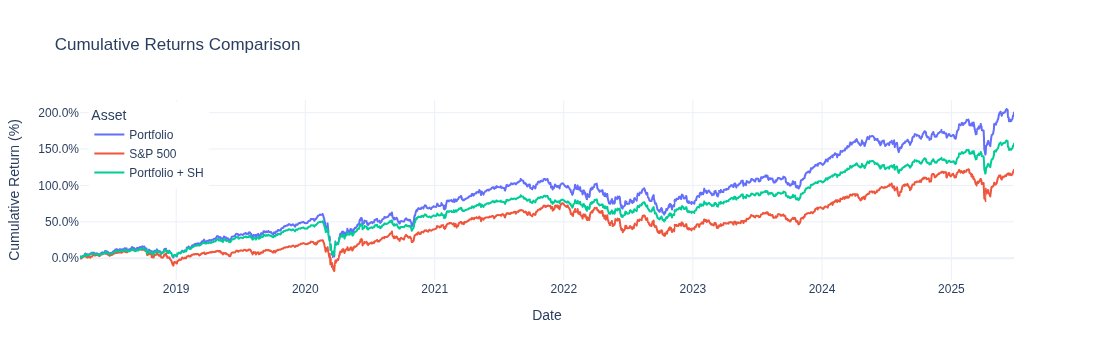

In [33]:
plot_cumulative_returns(results_df['Portfolio'], results_df['SP500'], results_df['Portfolio + SH'], 'Portfolio + SH')

# Return Plot - Portfolio, SP500, Portfolio + x% UVIX

In [34]:
start_date_str = '2018-04-01'
end_date_str = '2025-06-30'
uvix_returns = get_uvix_daily_returns(start_date_str, end_date_str)
aligned_data_uvix = pd.concat([portfolio_returns, sp500_returns, uvix_returns], axis=1).dropna()
print(aligned_data_uvix.shape)

/tmp/ipykernel_3344039/953243747.py:15: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

(790, 3)


In [35]:
aligned_data_uvix.columns = ['Portfolio', 'SP500', 'UVIX']
aligned_data_uvix

,Portfolio,SP500,UVIX
2022-04-04,0.009006,0.008091,-0.089805
2022-04-05,-0.013501,-0.012552,0.150983
2022-04-06,-0.018707,-0.009717,0.040268
2022-04-07,-0.003574,0.004253,-0.044575
2022-04-08,-0.004763,-0.002651,-0.007366
...,...,...,...
2025-06-23,0.009036,0.009607,-0.027807
2025-06-24,0.012882,0.011122,-0.130913
2025-06-25,-0.001630,-0.000003,-0.029114
2025-06-26,0.007655,0.008020,-0.009561


In [36]:
uvix_weight = 0.1
results_df_uvix, corr_orig, new_correlation = calculate_correlations_with_add_x_etf(aligned_data_uvix, uvix_weight, 'UVIX')
print(f"Original Correlation with S&P 500: {corr_orig:.4f}")
print(f"New Correlation with S&P 500: {new_correlation:.4f}")
results_df_uvix.to_csv('daily_return_uvix.csv', index=False)

Original Correlation with S&P 500: 0.8514
New Correlation with S&P 500: 0.1405


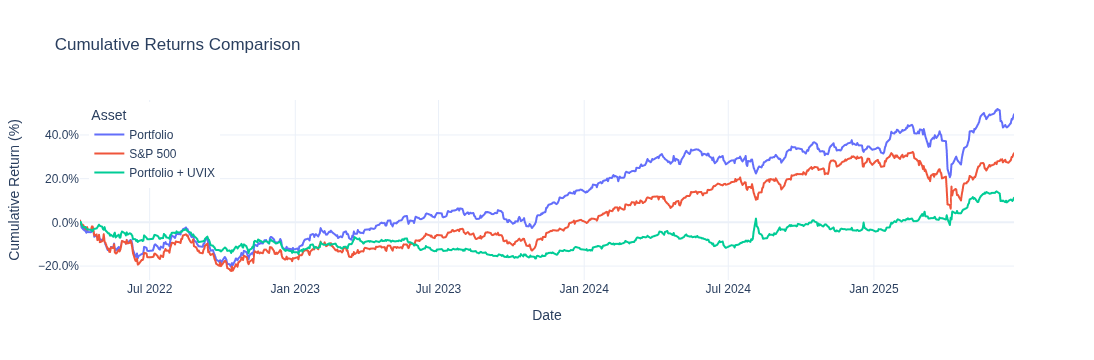

In [37]:
plot_cumulative_returns(results_df_uvix['Portfolio'], results_df_uvix['SP500'], results_df_uvix['Portfolio + UVIX'], 'Portfolio + UVIX')

# Return Plot - Portfolio, SP500, Portfolio + x% -MINISP500

In [38]:
def get_mini_sp500_daily_returns(start_date, end_date):
    """
    Downloads daily adjusted close price data for the MINISP500 and calculates
    its daily returns.

    Args:
        start_date (str): The start date for the data download (YYYY-MM-DD).
        end_date (str): The end date for the data download (YYYY-MM-DD).

    Returns:
        pd.Series: A Series of the MINISP500's daily returns.
    """
    try:
        minisp500_data = yf.download('ES=F', start=start_date, end=end_date)['Close']
        
        # Calculate the daily percentage change and remove any NaN values
        minisp500_returns = minisp500_data.pct_change().dropna()
        
        return minisp500_returns
    except Exception as e:
        print(f"Error fetching MINISP500 data: {e}")
        return pd.Series()

In [39]:
start_date_str = '2018-04-01'
end_date_str = '2025-06-30'
mini_sp500_returns = get_mini_sp500_daily_returns(start_date_str, end_date_str) * (-1)
aligned_data_mini_sp500 = pd.concat([portfolio_returns, sp500_returns, mini_sp500_returns], axis=1).dropna()
print(aligned_data_mini_sp500.shape)

/tmp/ipykernel_3344039/1034657158.py:14: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

(1763, 3)


In [40]:
aligned_data_mini_sp500.columns = ['Portfolio', 'SP500', 'MINISP500']
aligned_data_mini_sp500 

,Portfolio,SP500,MINISP500
2018-04-04,0.005362,0.011566,-0.012915
2018-04-05,0.019906,0.006863,-0.005572
2018-04-06,-0.014519,-0.021920,0.021039
2018-04-09,0.007606,0.003337,-0.005085
2018-04-10,0.009320,0.016727,-0.013746
...,...,...,...
2025-06-23,0.009036,0.009607,-0.011113
2025-06-24,0.012882,0.011122,-0.011395
2025-06-25,-0.001630,-0.000003,-0.000122
2025-06-26,0.007655,0.008020,-0.007809


In [41]:
mini_sp500_weight = 0.1
results_df_mini_sp500, corr_orig, new_correlation = calculate_correlations_with_add_x_etf(aligned_data_mini_sp500, mini_sp500_weight, 'MINISP500')
print(f"Original Correlation with S&P 500: {corr_orig:.4f}")
print(f"New Correlation with S&P 500: {new_correlation:.4f}")
results_df_mini_sp500.to_csv('daily_return_mini_sp500.csv', index=False)

Original Correlation with S&P 500: 0.8808
New Correlation with S&P 500: 0.8521


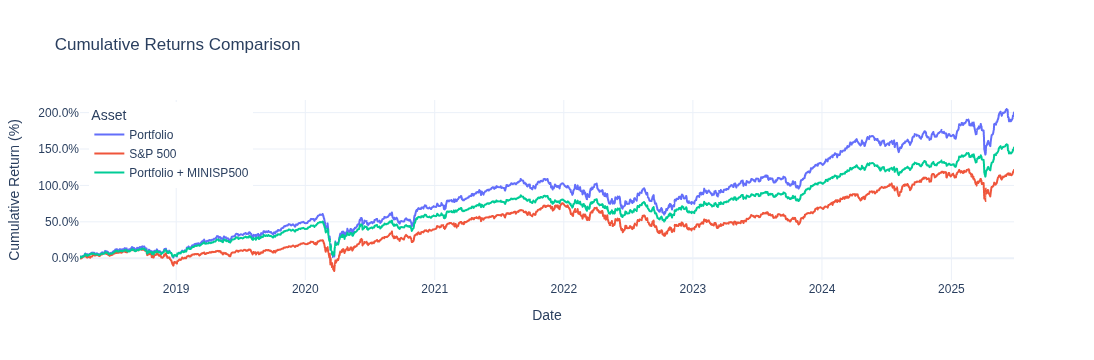

In [42]:
plot_cumulative_returns(results_df_mini_sp500['Portfolio'], results_df_mini_sp500['SP500'], results_df_mini_sp500['Portfolio + MINISP500'], 'Portfolio + MINISP500')

# Return Plot - Portfolio, SP500, Portfolio + x% -SP500

In [43]:
aligned_data_minus_sp500 = pd.concat([portfolio_returns, sp500_returns, sp500_returns*(-1)], axis=1).dropna()
print(aligned_data_minus_sp500.shape)

(1763, 3)


In [44]:
aligned_data_minus_sp500.columns = ['Portfolio', 'SP500', 'MINUSSP500']
aligned_data_minus_sp500

,Portfolio,SP500,MINUSSP500
2018-04-04,0.005362,0.011566,-0.011566
2018-04-05,0.019906,0.006863,-0.006863
2018-04-06,-0.014519,-0.021920,0.021920
2018-04-09,0.007606,0.003337,-0.003337
2018-04-10,0.009320,0.016727,-0.016727
...,...,...,...
2025-06-23,0.009036,0.009607,-0.009607
2025-06-24,0.012882,0.011122,-0.011122
2025-06-25,-0.001630,-0.000003,0.000003
2025-06-26,0.007655,0.008020,-0.008020


In [45]:
minus_sp500_weight = 0.1
results_df_minus_sp500, corr_orig, new_correlation = calculate_correlations_with_add_x_etf(aligned_data_minus_sp500, minus_sp500_weight, 'MINUSSP500')
print(f"Original Correlation with S&P 500: {corr_orig:.4f}")
print(f"New Correlation with S&P 500: {new_correlation:.4f}")
results_df_minus_sp500.to_csv('daily_return_minus_sp500.csv', index=False)

Original Correlation with S&P 500: 0.8808
New Correlation with S&P 500: 0.8495


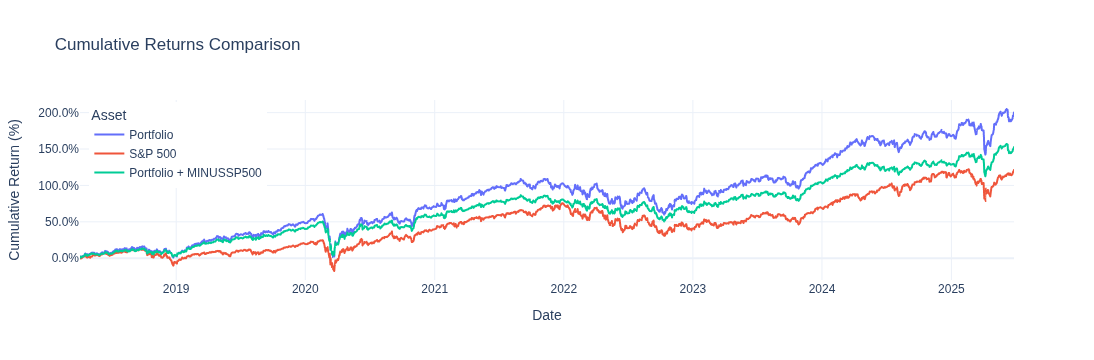

In [46]:
plot_cumulative_returns(results_df_minus_sp500['Portfolio'], results_df_minus_sp500['SP500'], results_df_minus_sp500['Portfolio + MINUSSP500'], 'Portfolio + MINUSSP500')